## 1-Évolution de vente des bouteilles champagne

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
champagne=pd.read_csv('monthly_champagne_sales.csv')

In [3]:
champagne.head()

,Month,Sales
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [4]:
print("La moyenne de la serie est ",champagne['Sales'].mean())
print("La variance de la serie est : ",champagne['Sales'].var() )
print("L'ecart-type de la serie est : ",champagne['Sales'].std())

La moyenne de la serie est  4761.152380952381
La variance de la serie est :  6520375.534249082
L'ecart-type de la serie est :  2553.5026011831437


In [5]:
champagne.isna().sum()

Month    0
Sales    0
dtype: int64

In [6]:
champagne['Month']=pd.to_datetime(champagne['Month'])

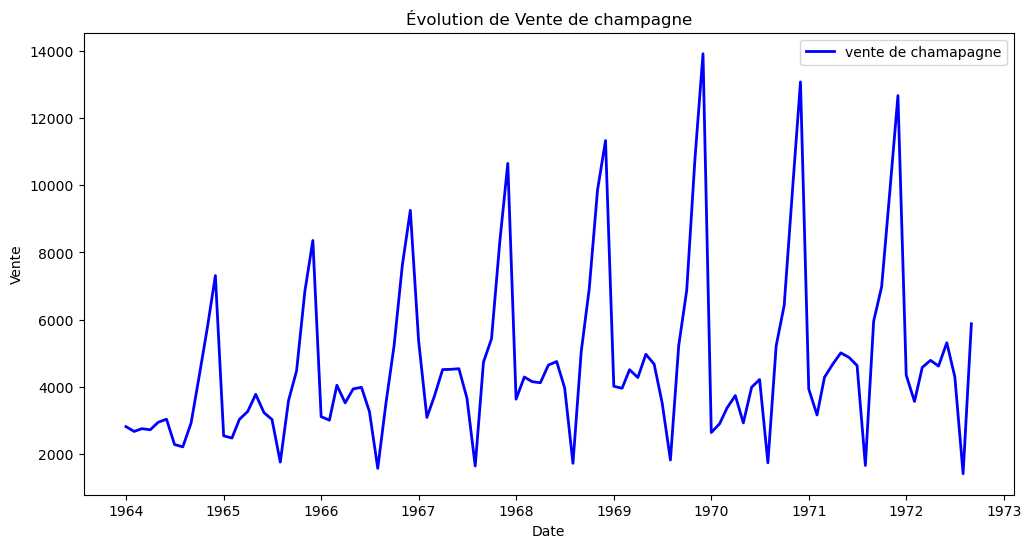

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(champagne['Month'], champagne['Sales'], color='b', linewidth=2, label='vente de chamapagne')
plt.xlabel('Date')
plt.ylabel('Vente')
plt.title('Évolution de Vente de champagne')
plt.legend()
plt.show()

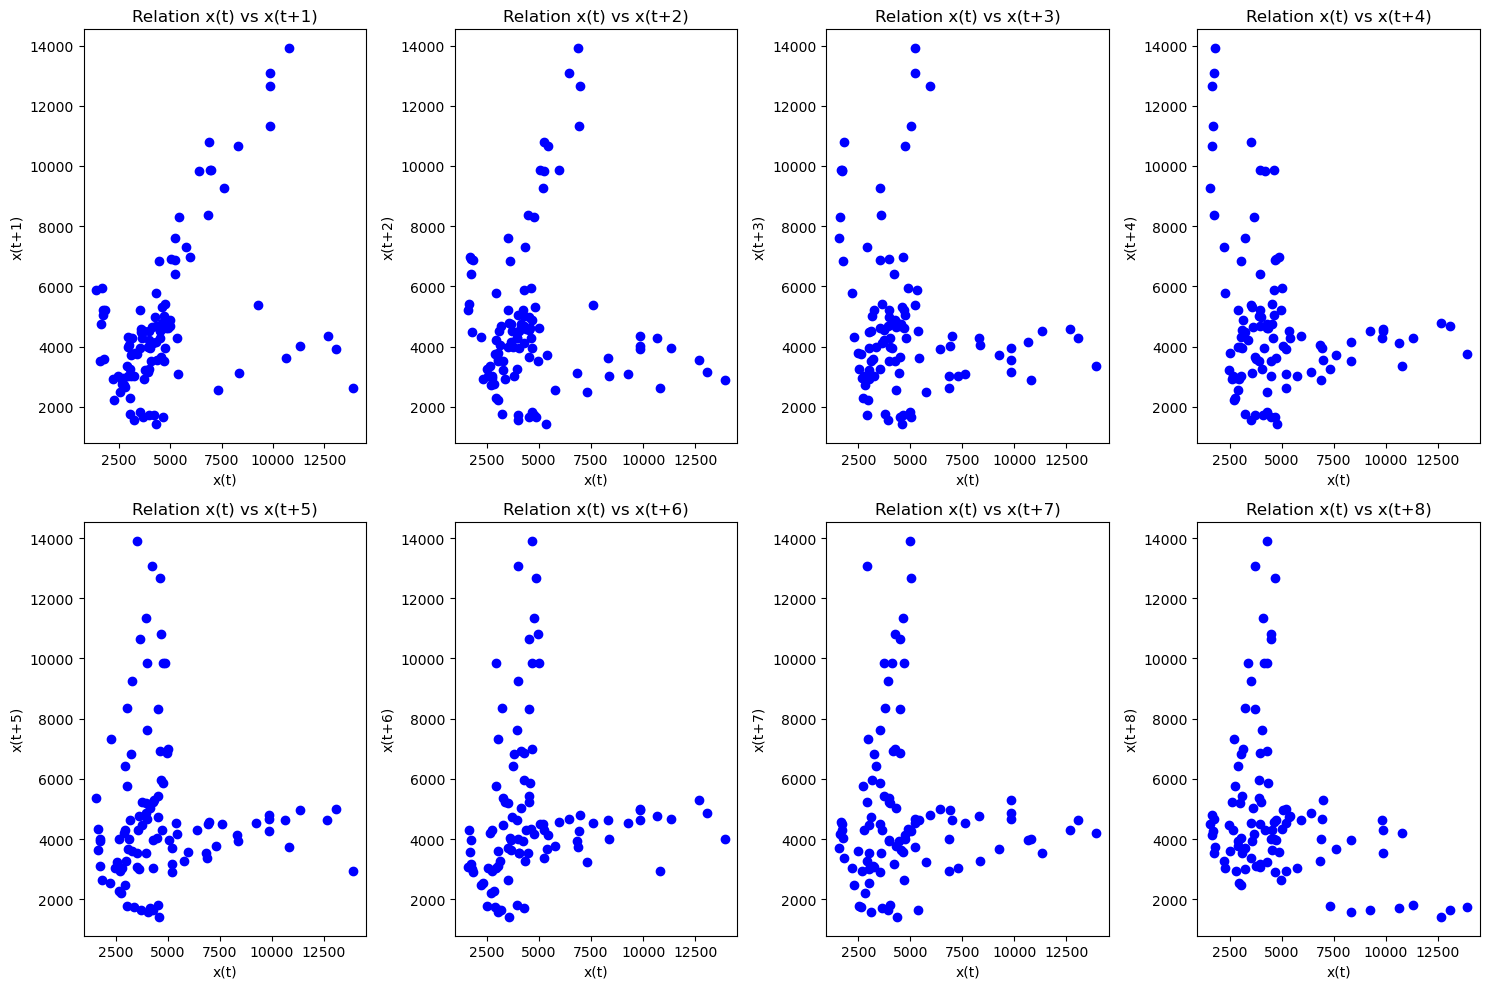

In [61]:
n = len(champagne['Sales'])

plt.figure(figsize=[15,10])
for i in range(1, 9):
    plt.subplot(2, 4, i)
    plt.scatter(champagne['Sales'][0:n-i], champagne['Sales'][i:n], color='blue')
    plt.xlabel('x(t)')
    plt.ylabel(f'x(t+{i})')
    plt.title(f'Relation x(t) vs x(t+{i})')
plt.tight_layout()
plt.show()

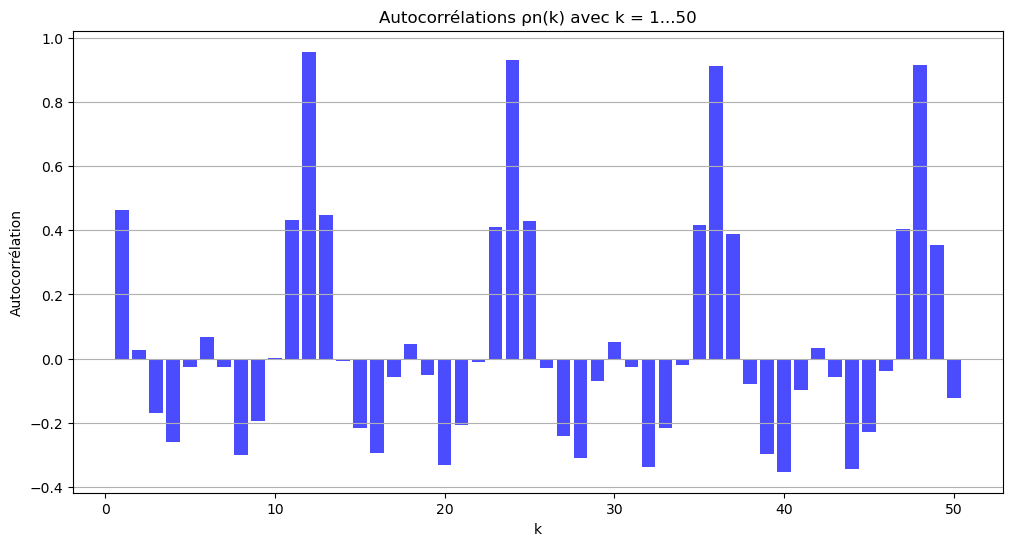

In [9]:
# Calculer les autocorrélations ρn(k) pour k = 1...50
autocorrs = [champagne['Sales'].autocorr(lag=k) for k in range(1, 51)]

# Créer un graphique à barres pour les autocorrélations
plt.figure(figsize=(12, 6))
plt.bar(range(1, 51), autocorrs, color='b', alpha=0.7)
plt.xlabel('k')
plt.ylabel('Autocorrélation')
plt.title('Autocorrélations ρn(k) avec k = 1...50')
plt.grid(axis='y')
plt.show()

Apres la visualisation des differents graphique,on vois bien la presence d'une tendance faible et d'une saisonnalité.

Prouvons le en decomposans la serie.

In [10]:
champagne.set_index('Month',inplace=True)

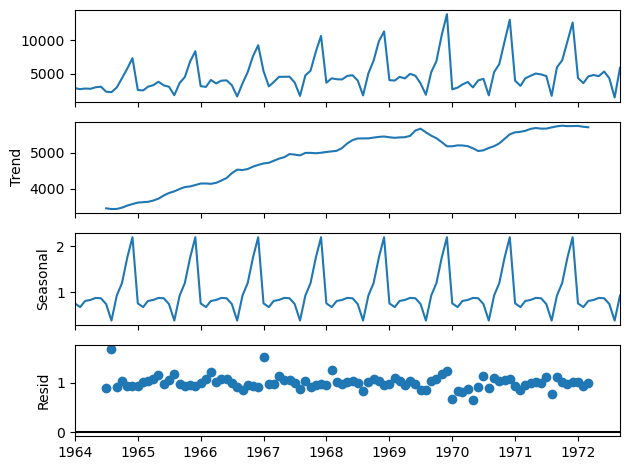

In [11]:
analysis = champagne[['Sales']].copy()


decompose_result_mult = seasonal_decompose(analysis, model="multiplicative")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot();

## 2-Trafic Aerien de 1949 a 1960

In [13]:
serie=pd.read_csv("trafic_aerien\AirPassengers.csv")

In [14]:
serie.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [15]:
serie.rename(columns={'Month':'Date','#Passengers':'passagers'},inplace=True)

In [16]:
serie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       144 non-null    object
 1   passagers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [17]:
serie['passagers'].describe().T

count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: passagers, dtype: float64

In [18]:
serie.isna().sum()

Date         0
passagers    0
dtype: int64

In [19]:
serie['Date']=pd.to_datetime(serie['Date'])

In [20]:
print("La moyenne de la serie est ",serie['passagers'].mean())
print("La variance de la serie est : ",serie['passagers'].var() )
print("L'ecart-type de la serie est : ",serie['passagers'].std())

La moyenne de la serie est  280.2986111111111
La variance de la serie est :  14391.917200854701
L'ecart-type de la serie est :  119.96631694294321


In [21]:
serie.describe()

,Date,passagers
count,144,144.000000
mean,1954-12-16 05:00:00,280.298611
min,1949-01-01 00:00:00,104.000000
25%,1951-12-24 06:00:00,180.000000
50%,1954-12-16 12:00:00,265.500000
75%,1957-12-08 18:00:00,360.500000
max,1960-12-01 00:00:00,622.000000
std,NaN,119.966317


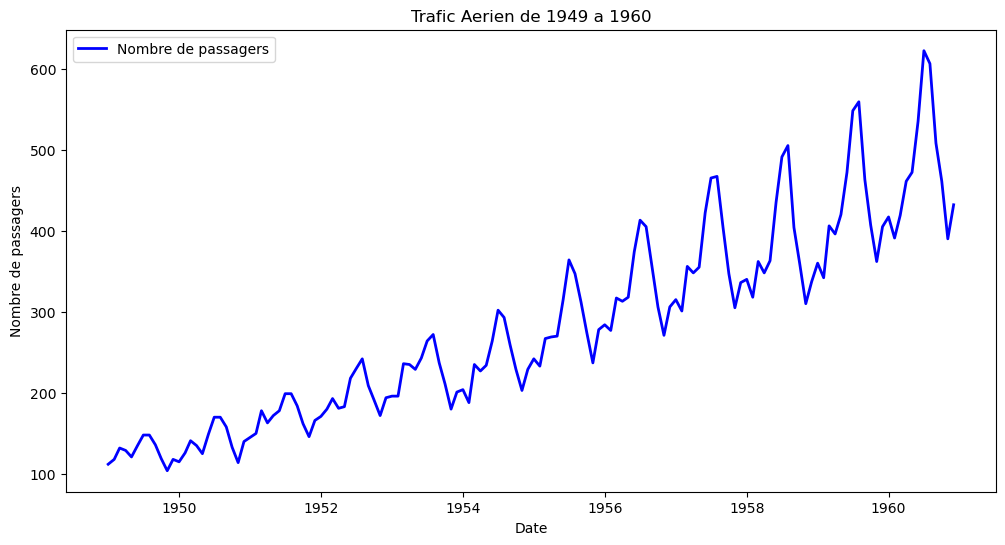

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(serie['Date'], serie['passagers'], color='b', linewidth=2, label='Nombre de passagers')
plt.xlabel('Date')
plt.ylabel('Nombre de passagers')
plt.title('Trafic Aerien de 1949 a 1960')
plt.legend()
plt.show()

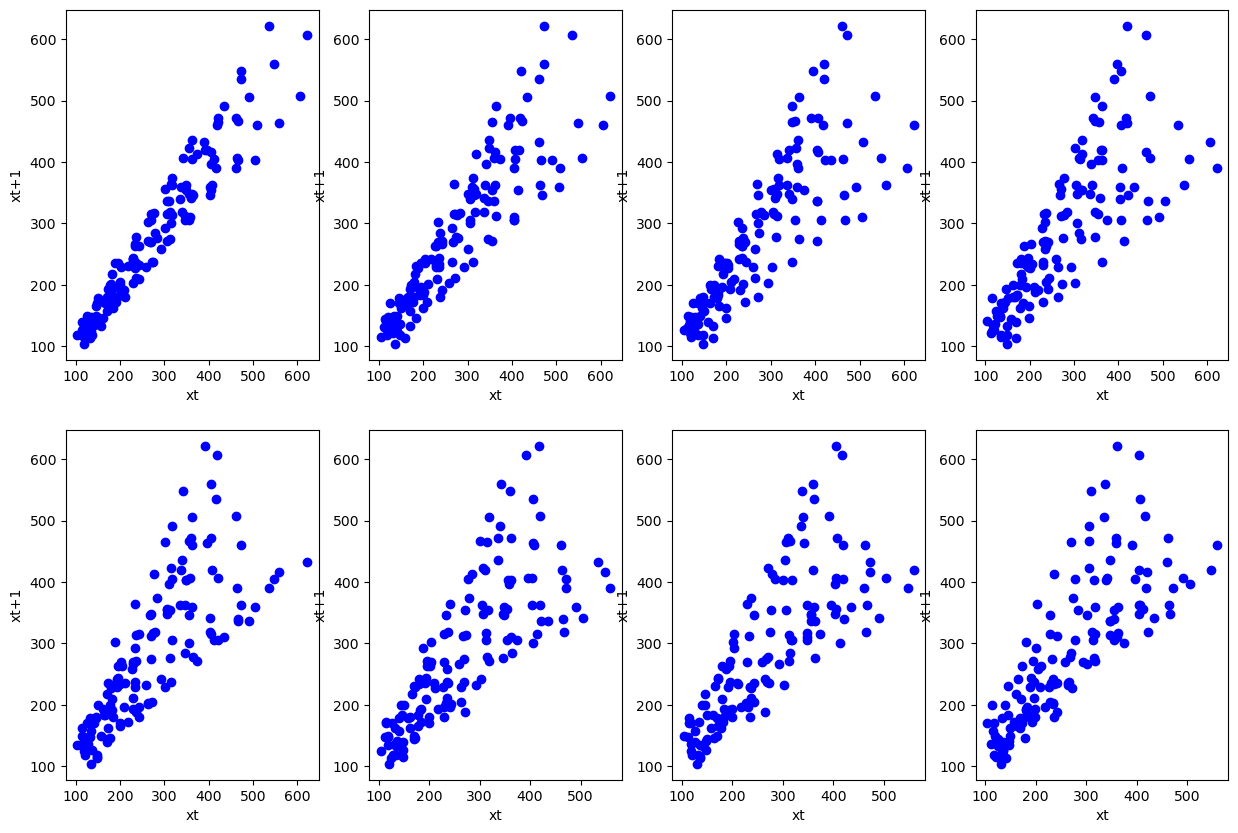

In [23]:
n = len(serie['passagers'])

plt.figure(figsize=[15,10])
for i in range(1,9):
    plt.subplot(2, 4, i)
    plt.scatter(serie['passagers'][0:n-i], serie['passagers'][0+i:n],color='blue')
    plt.xlabel('xt')
    plt.ylabel('xt+1')
plt.show()

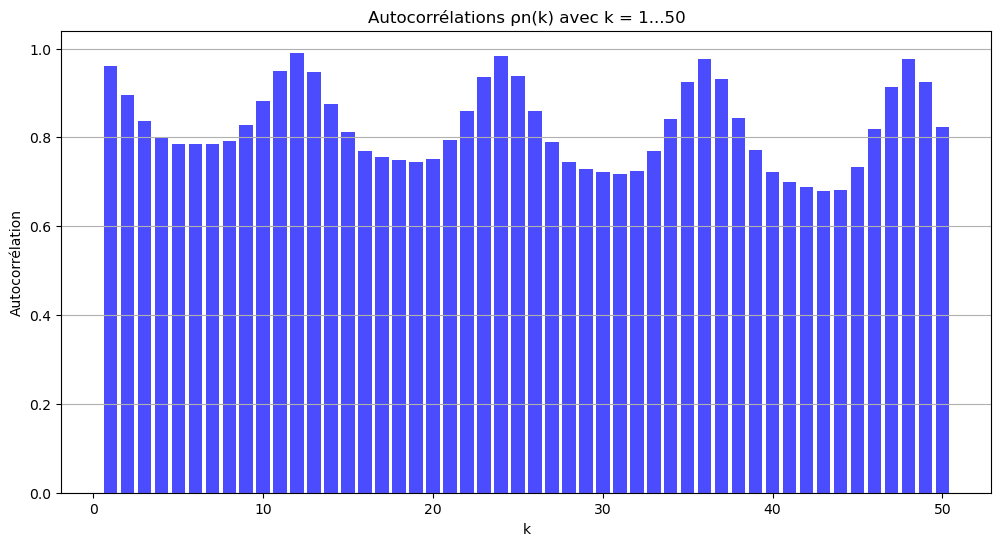

In [24]:
# Calculer les autocorrélations ρn(k) pour k = 1...50
autocorrs = [serie['passagers'].autocorr(lag=k) for k in range(1, 51)]

# Créer un graphique à barres pour les autocorrélations
plt.figure(figsize=(12, 6))
plt.bar(range(1, 51), autocorrs, color='b', alpha=0.7)
plt.xlabel('k')
plt.ylabel('Autocorrélation')
plt.title('Autocorrélations ρn(k) avec k = 1...50')
plt.grid(axis='y')
plt.show()

Apres la visualisation des differents graphique,on vois bien la presence d'une tendance et d'une saisonnalité,

Prouvons le en decomposans la serie.

In [25]:
serie.set_index('Date',inplace=True)

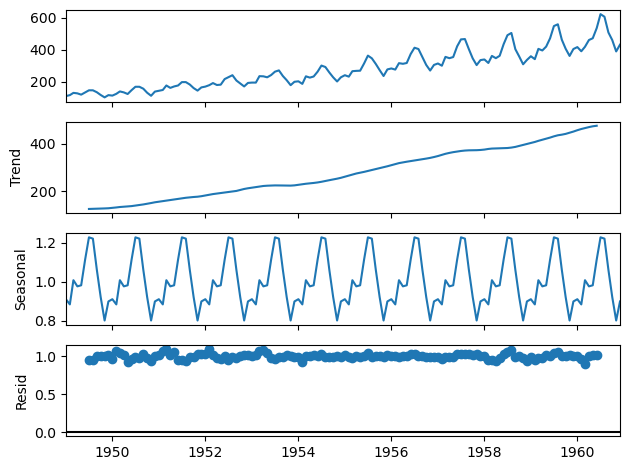

In [26]:
analysis = serie[['passagers']].copy()


decompose_result_mult = seasonal_decompose(analysis, model="multiplicative")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot();

## 3-Évolution de la population aux États-Unis

In [28]:
demo=pd.read_csv('demographie_usa\POP.csv')

In [29]:
demo.head()

,realtime_start,value,date,realtime_end
0,2019-12-06,156309.0,1952-01-01,2019-12-06
1,2019-12-06,156527.0,1952-02-01,2019-12-06
2,2019-12-06,156731.0,1952-03-01,2019-12-06
3,2019-12-06,156943.0,1952-04-01,2019-12-06
4,2019-12-06,157140.0,1952-05-01,2019-12-06


In [30]:
demo.rename(columns={"value":"population"},inplace=True)

In [31]:
print("La moyenne de la serie est ",demo['population'].mean())
print("La variance de la serie est : ",demo['population'].var() )
print("L'ecart-type de la serie est : ",demo['population'].std())

La moyenne de la serie est  243847.7678259804
La variance de la serie est :  2552183563.6000853
L'ecart-type de la serie est :  50519.1405667207


In [32]:
demo.describe()

,population
count,816.000000
mean,243847.767826
std,50519.140567
min,156309.000000
25%,201725.250000
50%,239557.500000
75%,289364.250000
max,330309.946000


In [33]:
demo.drop(['realtime_start','realtime_end'],inplace=True,axis=1)

In [34]:
demo.head()

,population,date
0,156309.0,1952-01-01
1,156527.0,1952-02-01
2,156731.0,1952-03-01
3,156943.0,1952-04-01
4,157140.0,1952-05-01


In [35]:
demo.isna().sum()

population    0
date          0
dtype: int64

In [36]:
demo['date']=pd.to_datetime(demo['date'])

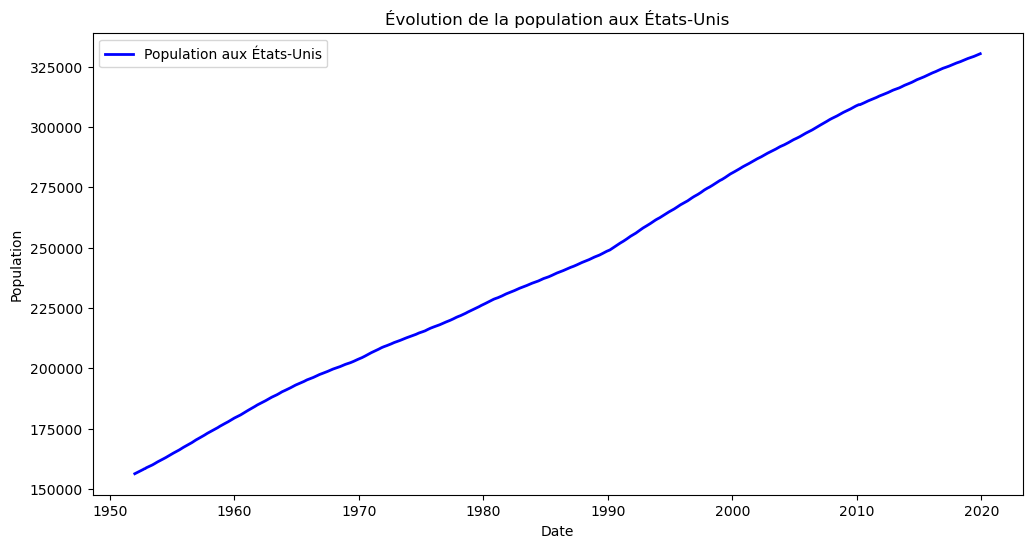

In [37]:
plt.figure(figsize=(12, 6))
plt.plot(demo['date'], demo['population'], color='b', linewidth=2, label='Population aux États-Unis')
plt.xlabel('Date')
plt.ylabel('Population')
plt.title('Évolution de la population aux États-Unis')
plt.legend()
plt.show()

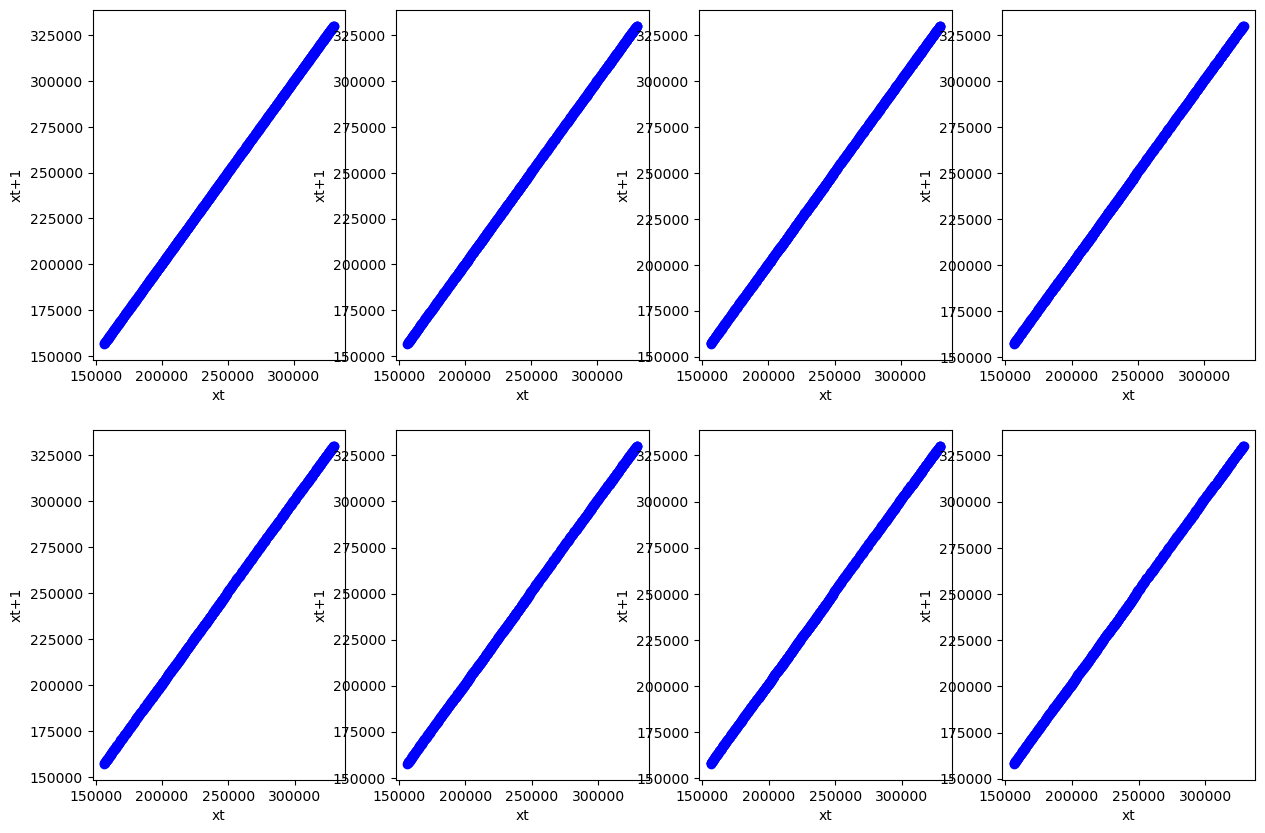

In [38]:
n = len(demo['population'])

plt.figure(figsize=[15,10])
for i in range(1,9):
    plt.subplot(2, 4, i)
    plt.scatter(demo['population'][0:n-i], demo['population'][0+i:n],color='blue')
    plt.xlabel('xt')
    plt.ylabel('xt+1')
plt.show()

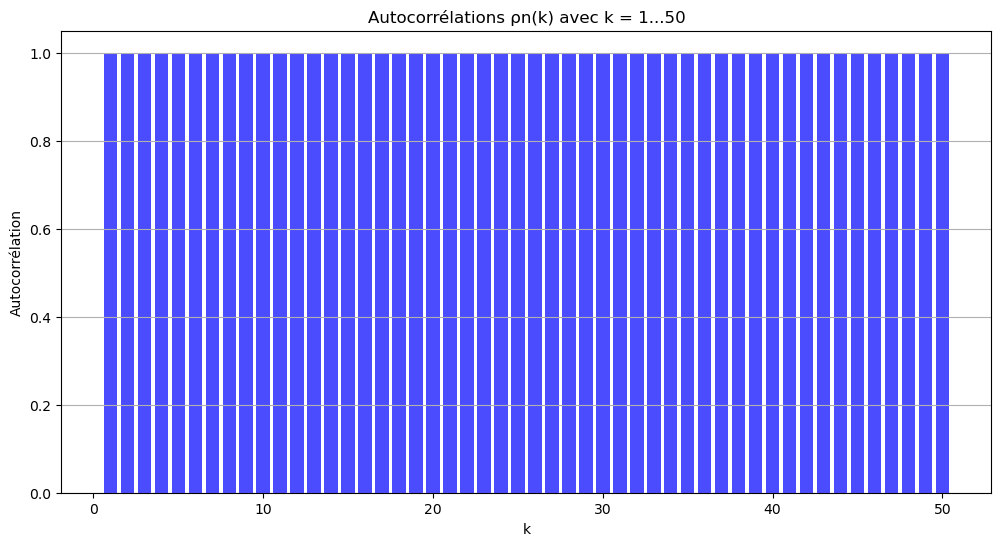

In [39]:
# Calculer les autocorrélations ρn(k) pour k = 1...50
autocorrs = [demo['population'].autocorr(lag=k) for k in range(1, 51)]

# Créer un graphique à barres pour les autocorrélations
plt.figure(figsize=(12, 6))
plt.bar(range(1, 51), autocorrs, color='b', alpha=0.7)
plt.xlabel('k')
plt.ylabel('Autocorrélation')
plt.title('Autocorrélations ρn(k) avec k = 1...50')
plt.grid(axis='y')
plt.show()

Apres la visualisation des differents graphique,on vois bien la presence d'une forte tendance quadratique et mais pas de saisonnalité,

Prouvons le en decomposans la serie.

In [40]:
demo.set_index('date',inplace=True)

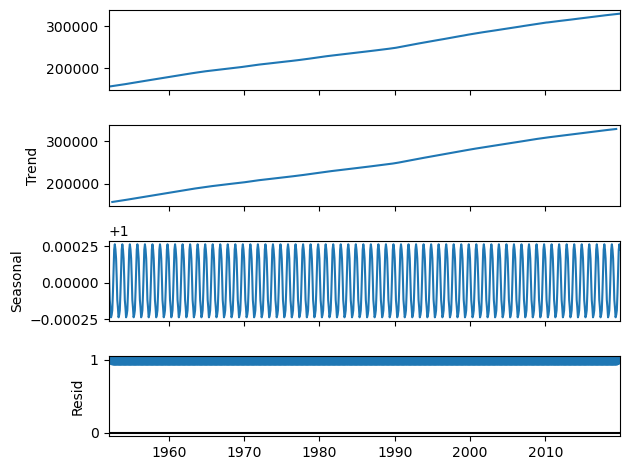

In [41]:
analysis = demo[['population']].copy()


decompose_result_mult = seasonal_decompose(analysis, model="multiplicative")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot();

## 4-Bourse nationnale

In [43]:
bourse=pd.read_csv('bourse_nationnale/infy_stock.csv')

In [44]:
bourse.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.9,1971.00,1974.40,1971.34,500691,9.870306e+13,14908,258080,0.5154
1,2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.0,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371
2,2015-01-05,INFY,EQ,2013.20,2009.90,2030.00,1977.5,1996.00,1995.90,2004.59,2484256,4.979911e+14,82694,1830962,0.7370
3,2015-01-06,INFY,EQ,1995.90,1980.00,1985.00,1934.1,1965.10,1954.20,1954.82,2416829,4.724458e+14,108209,1772070,0.7332
4,2015-01-07,INFY,EQ,1954.20,1965.00,1974.75,1950.0,1966.05,1963.55,1962.59,1812479,3.557162e+14,62463,1317720,0.7270


In [45]:
print("La moyenne de la serie est ",bourse['Close'].mean())
print("La variance de la serie est : ",bourse['Close'].var() )
print("L'ecart-type de la serie est : ",bourse['Close'].std())

La moyenne de la serie est  1547.9782258064515
La variance de la serie est :  280336.56274258846
L'ecart-type de la serie est :  529.4681886030439


In [46]:
bourse['Date']=pd.to_datetime(bourse['Date'])

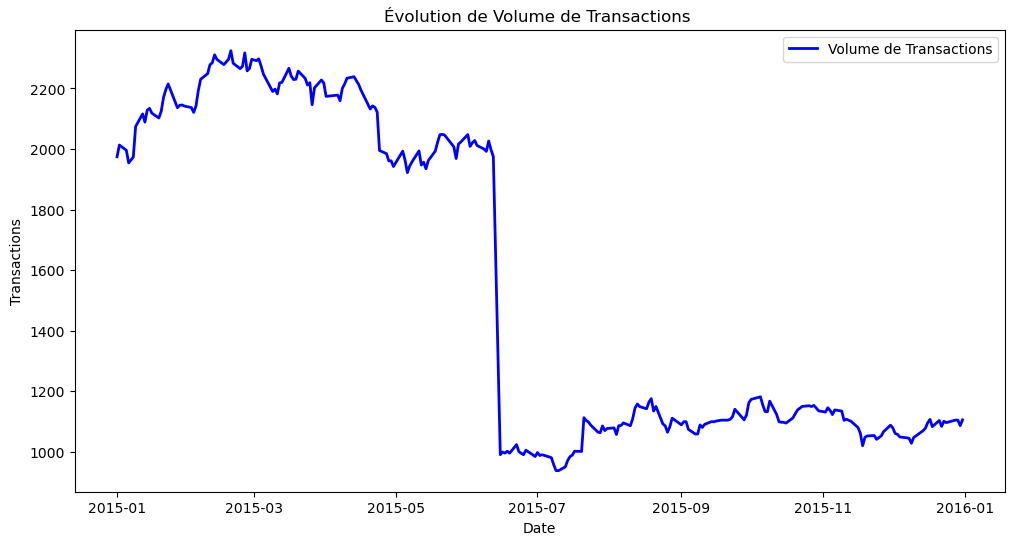

In [47]:
plt.figure(figsize=(12, 6))
plt.plot(bourse['Date'], bourse['Close'], color='b', linewidth=2, label='Volume de Transactions')
plt.xlabel('Date')
plt.ylabel('Transactions')
plt.title('Évolution de Prix en Bourse ')
plt.legend()
plt.show()

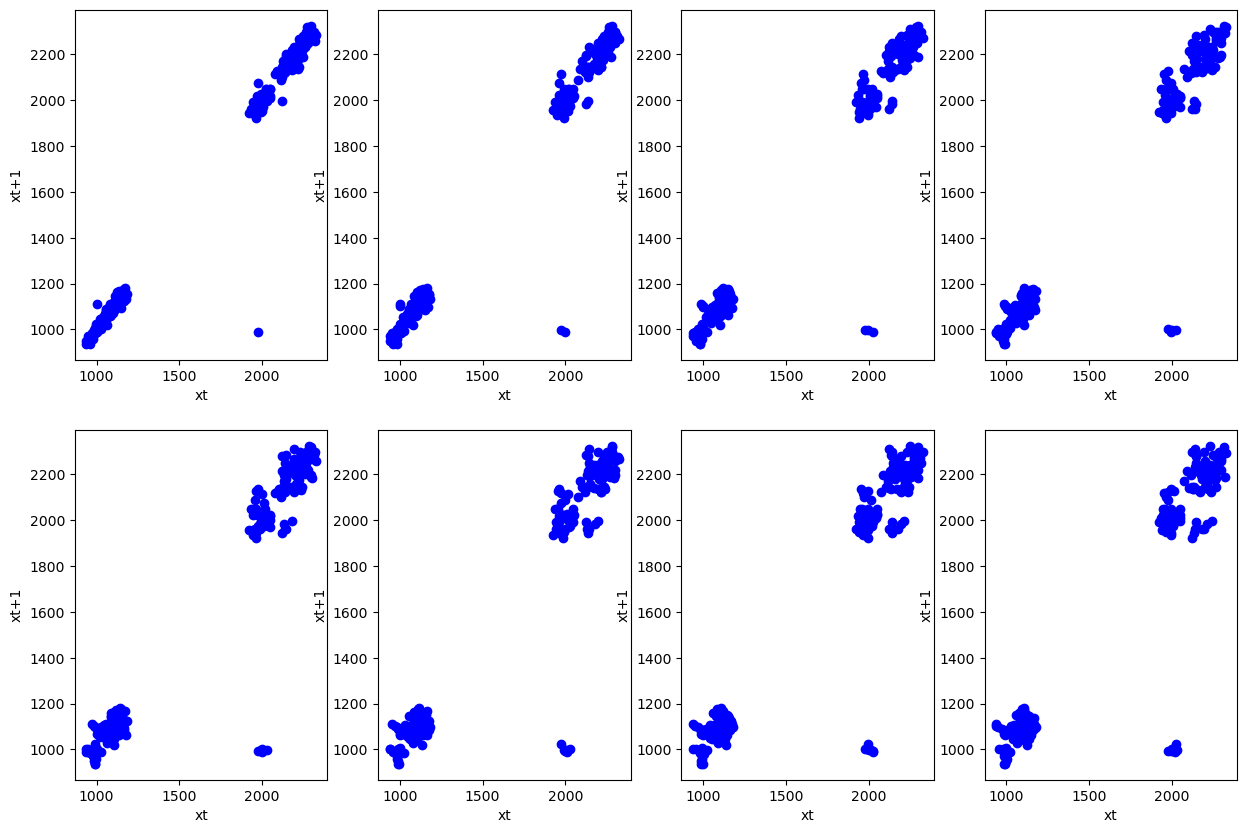

In [48]:
n = len(bourse['Close'])

plt.figure(figsize=[15,10])
for i in range(1,9):
    plt.subplot(2, 4, i)
    plt.scatter(bourse['Close'][0:n-i], bourse['Close'][0+i:n],color='blue')
    plt.xlabel('xt')
    plt.ylabel('xt+1')
plt.show()

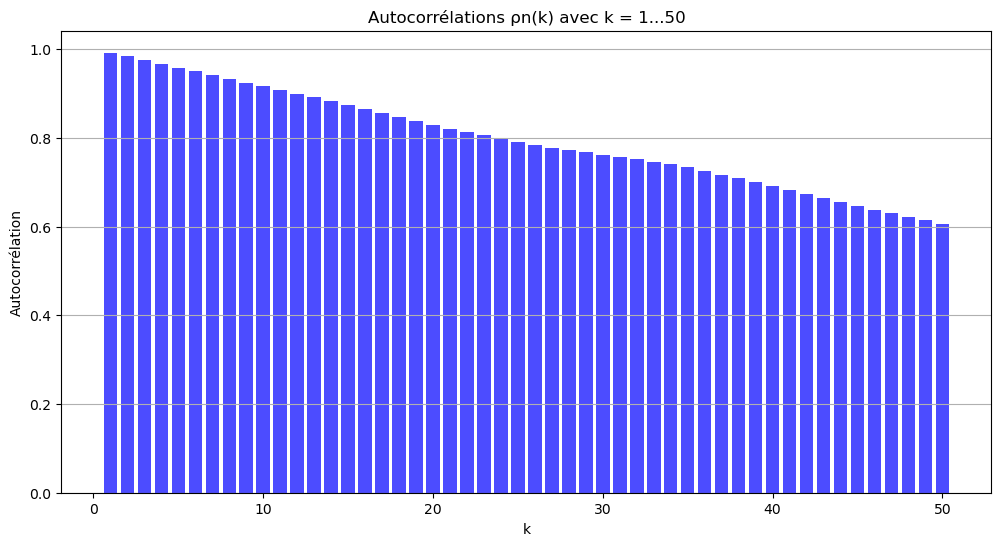

In [49]:
# Calculer les autocorrélations ρn(k) pour k = 1...50
autocorrs = [bourse['Close'].autocorr(lag=k) for k in range(1, 51)]

# Créer un graphique à barres pour les autocorrélations
plt.figure(figsize=(12, 6))
plt.bar(range(1, 51), autocorrs, color='b', alpha=0.7)
plt.xlabel('k')
plt.ylabel('Autocorrélation')
plt.title('Autocorrélations ρn(k) avec k = 1...50')
plt.grid(axis='y')
plt.show()

Apres la visualisation des differents graphique,on vois bien la presence d'une saisonnalité mais pas de tendance,

## 5-Evolution du climat en inde

In [51]:
climat=pd.read_csv('temperature_ambiante/MLTempDataset.csv')

In [52]:
climat.head()

,Unnamed: 0,Datetime1,DAYTON_MW,Datetime
0,0,0,20.867,2022-01-04 00:00:00
1,1,1,21.000,2022-01-04 01:00:00
2,2,2,20.867,2022-01-04 02:00:00
3,3,3,20.650,2022-01-04 03:00:00
4,4,4,20.400,2022-01-04 04:00:00


In [53]:
print("La moyenne de la serie est ",climat['DAYTON_MW'].mean())
print("La variance de la serie est : ",climat['DAYTON_MW'].var() )
print("L'ecart-type de la serie est : ",climat['DAYTON_MW'].std())

La moyenne de la serie est  18.662339366515837
La variance de la serie est :  31.14975349794323
L'ecart-type de la serie est :  5.581196421731028


In [54]:
climat['Datetime']=pd.to_datetime(climat['Datetime'])

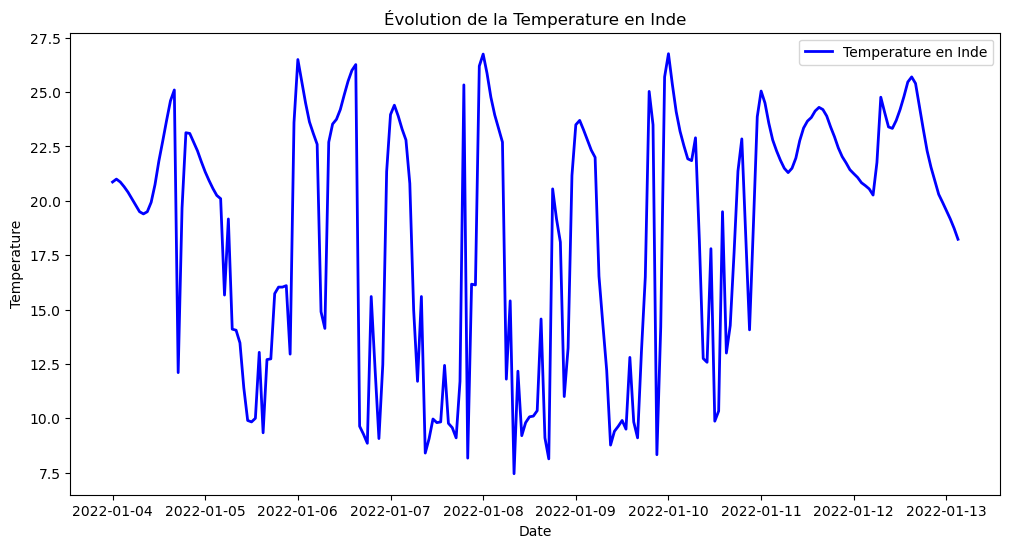

In [55]:
plt.figure(figsize=(12, 6))
plt.plot(climat['Datetime'][:220], climat['DAYTON_MW'][:220], color='b', linewidth=2, label='Temperature en Inde')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Évolution de la Temperature en Inde')
plt.legend()
plt.show()

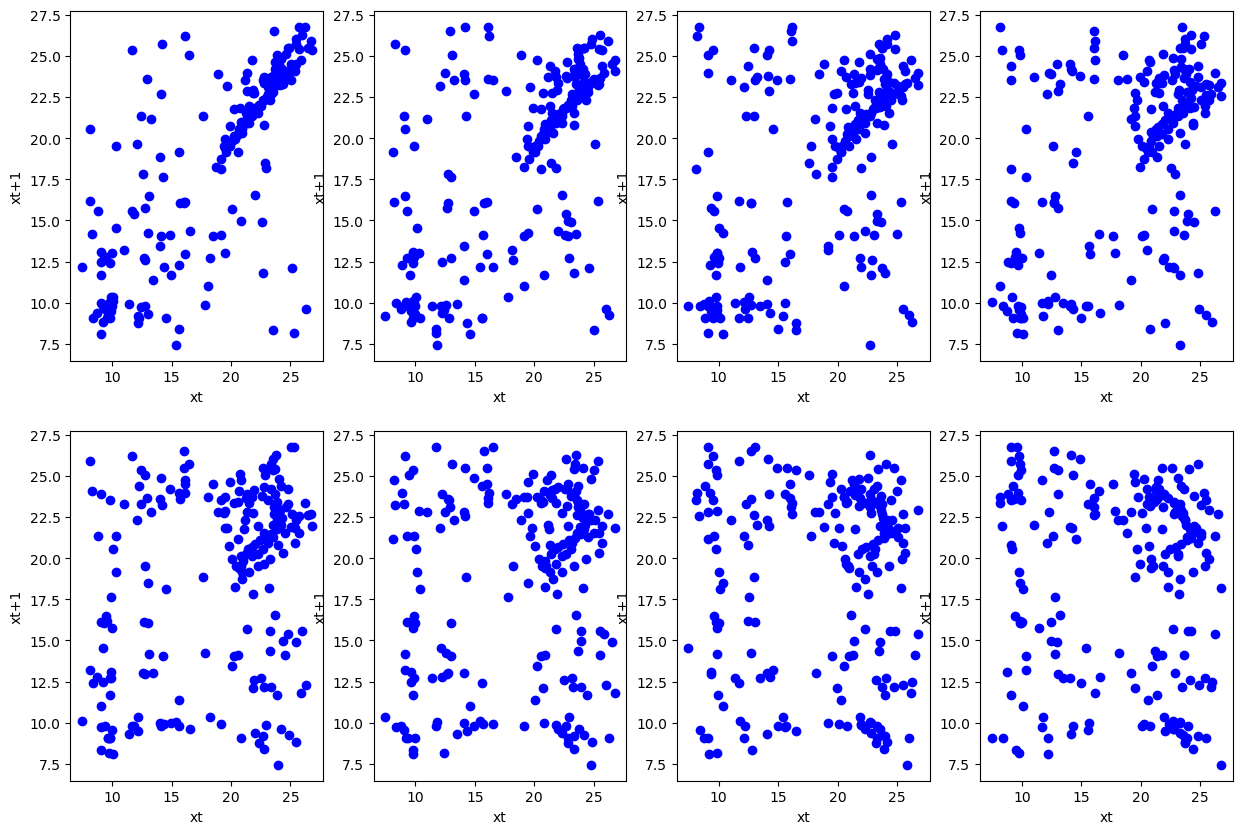

In [56]:
n = len(climat['DAYTON_MW'])

plt.figure(figsize=[15,10])
for i in range(1,9):
    plt.subplot(2, 4, i)
    plt.scatter(climat['DAYTON_MW'][0:220-i], climat['DAYTON_MW'][0+i:220],color='blue')
    plt.xlabel('xt')
    plt.ylabel('xt+1')
plt.show()

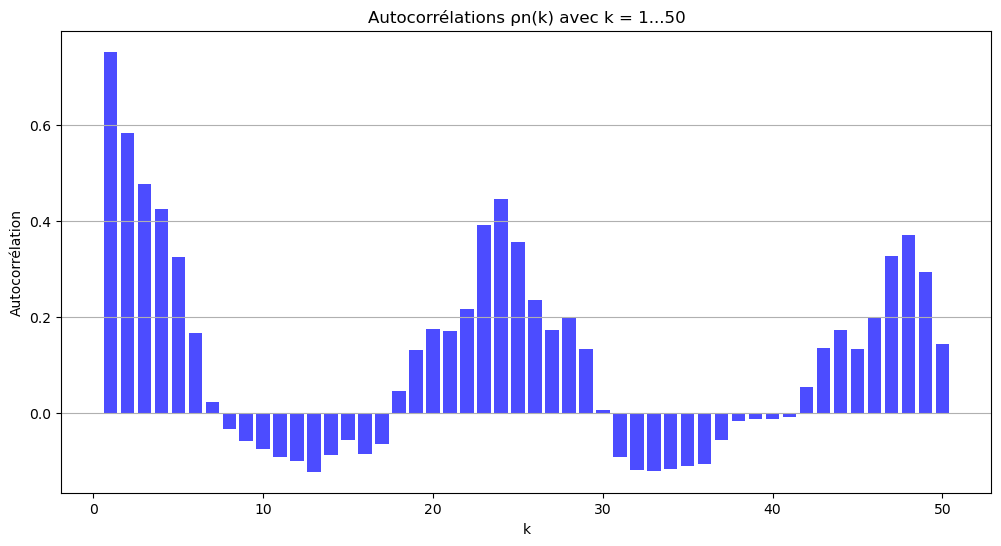

In [57]:
# Calculer les autocorrélations ρn(k) pour k = 1...50
autocorrs = [climat['DAYTON_MW'].autocorr(lag=k) for k in range(1, 51)]

# Créer un graphique à barres pour les autocorrélations
plt.figure(figsize=(12, 6))
plt.bar(range(1, 51), autocorrs, color='b', alpha=0.7)
plt.xlabel('k')
plt.ylabel('Autocorrélation')
plt.title('Autocorrélations ρn(k) avec k = 1...50')
plt.grid(axis='y')
plt.show()

Apres la visualisation des differents graphique,on vois bien la presence d'une saisonnalité mais pas de tendance,

Prouvons le en decomposans la serie.

In [58]:
climat.set_index('Datetime',inplace=True)

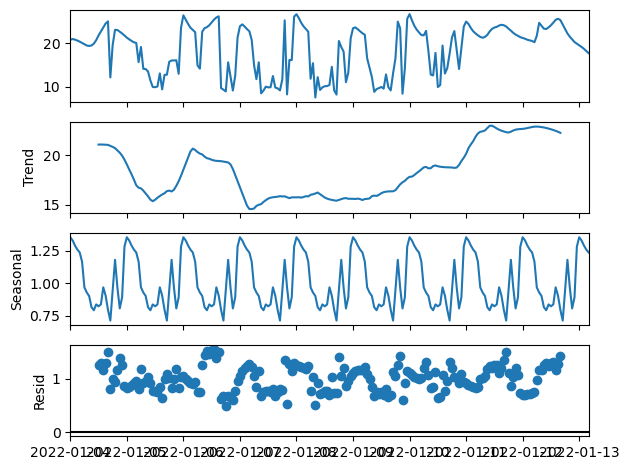

In [59]:
analysis = climat[['DAYTON_MW']].copy()


decompose_result_mult = seasonal_decompose(analysis, model="multiplicative")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot();